In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# Les recettes Italiennes

In [ ]:
df = pd.read_csv('./gz_recipe.csv')
df.head()

In [ ]:
df2 = pd.read_csv('./receipe_name_en.csv')
df["recipe_name"] = df2["Name"]

In [ ]:
df.head()

In [ ]:
df3 = pd.read_csv('./ingredients_en.csv')
print(df3.columns)

### Code

In [ ]:
row = df['Ingredienti'][0]
def getIngredient(row):
    row = row[2:-2]
    row = row.split('], [')
    res = []
    for item in row : 
        item = item.split(', ')
        tempres = []
        for item2 in item:
            tempres += [item2[1:-1]] 
        res += [tempres]
    return res
getIngredient(row)[0]

In [118]:
def getAllIng(df):
    allingredients = []
    for row in df['Ingredienti']:
        allingredients += [getIngredient(row)]
    return allingredients
ingredients = getAllIng(df)
print(len(ingredients))

5939


In [119]:
def getAllUniqueIngredients(ing):
    res = []
    for recipe in ing : 
        for ingredient in recipe:
            res += [ingredient[0]]

    uniques, counts = np.unique(res, return_counts=True)
    print(uniques)
    print(len(uniques))
    print(len(ing))
    return uniques, counts

un_ings, counts_ing = getAllUniqueIngredients(ingredients)
un_ing = pd.DataFrame(un_ings)
un_ing.to_csv("~/Documents/uniq_ing.csv")

['' 'Abbacchio' 'Acai in polvere' ... 'Zucchine trombetta' 'codette'
 'zenzero candito']
1642
5939


In [120]:
print(un_ings)
print(np.where(un_ings == 'Abbacchio')[0][0])

['' 'Abbacchio' 'Acai in polvere' ... 'Zucchine trombetta' 'codette'
 'zenzero candito']
1


In [121]:
df4 = copy.deepcopy(df)
df4['ing_en'] = "empty"
df4['ing_it'] = "empty"
df4['quant'] = ""
df4.head()
for r in range(len(df4)):
    row_ings = getIngredient(df4['Ingredienti'][r])
    temp_ings = []
    temp_it = []
    temp_quant = []
    for ing in row_ings:
        if ing != ['']:
            temp_ings += [df3['name'][np.where(un_ings == ing[0])[0][0] -1][1:]]
            temp_quant += [ing[1]]
            temp_it += [ing[0]]
    df4.at[r, 'ing_it'] = temp_it
    df4.at[r, 'ing_en'] = temp_ings
    df4.at[r, 'quant'] = temp_quant
      
df4.drop(columns=["Ingredienti", "Unnamed: 0"], axis=1, inplace=True)
df4.head()

df4.to_csv("./cleaned_dataset.csv", index=False)
    

In [130]:
df4.head()

,Nome,Categoria,Link,Persone/Pezzi,Steps,recipe_name,ing_en,ing_it,quant
0,Tiramisù,Dolci,https://ricette.giallozafferano.it/Tiramisu.html,8,Per preparare il tiramisù preparate il caffé c...,Tiramisu,"[Mascarpone, Eggs, Savoyards, Sugar, Coffee, B...","[Mascarpone, Uova, Savoiardi, Zucchero, Caffè,...","[750g, 260g, 250g, 120g, 300g, q.b.]"
1,Cookies,Dolci,https://ricette.giallozafferano.it/Cookies.html,12,"Per preparare i cookies, assicuratevi che il b...",Cookies,"[00 flour, Butter, Bicarbonate, Eggs, Cane sug...","[Farina 00, Burro, Bicarbonato, Uova, Zucchero...","[195g, 100g, 1pizzico, 55g, 100g, 100g, 200g, ..."
2,Pancake allo sciroppo d'acero,Dolci,https://ricette.giallozafferano.it/Pancakes-al...,4,Iniziamo la preparazione dei pancake fondendo ...,Maple syrup pancakes,"[Butter, 00 flour, Eggs, Whole milk, Baking po...","[Burro, Farina 00, Uova, Latte intero, Lievito...","[25g, 125g, 2, 200g, 6g, 15g, q.b.]"
3,Crema al mascarpone,Dolci,https://ricette.giallozafferano.it/Crema-al-ma...,4,Per preparare la crema al mascarpone versate i...,Mascarpone cream,"[Mascarpone, Sugar, Yolks, Water, Bitter cocoa...","[Mascarpone, Zucchero, Tuorli, Acqua, Cacao am...","[500g, 125g, 4, 50g, q.b.]"
4,Crepe dolci e salate (ricetta base),Dolci,https://ricette.giallozafferano.it/Crepes-dolc...,15,Per preparare le crepe dolci e salate iniziate...,Sweet and savory crepes (basic recipe),"[Eggs, 00 flour, Whole milk, Butter]","[Uova, Farina 00, Latte intero, Burro]","[3, 250g, 500ml, q.b.]"


In [143]:
import rdflib as rdf
from rdflib import RDF, Literal
schema = rdf.Namespace("http://schema.org/")
ex = rdf.Namespace("http://example.org/")
g = rdf.Graph()

for r in range(len(df4)):
    
    recipe_uri = ex[f"recipe_{r}"]
    
    g.add((recipe_uri, schema.type, schema.recipe))
    g.add((recipe_uri, schema.name, Literal(df4["recipe_name"][r], lang="en")))
    g.add((recipe_uri, schema.name, Literal(df4["Nome"][r], lang="it")))


##  Répartition des Types de plats

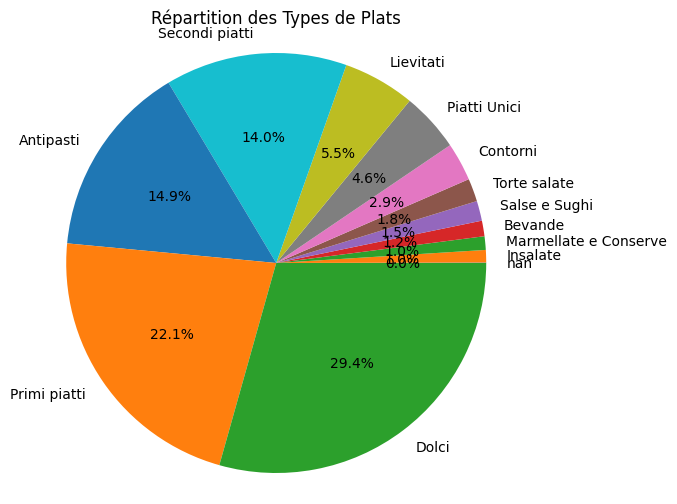

In [122]:
def showCamembertCat(categorie):
    cat = categorie.to_list()
    val, counts = np.unique(cat, return_counts=True)
    sort = np.argsort(counts)
    fig1, ax1 = plt.subplots()
    ax1.pie(counts[sort], labels=val[sort], autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title('Répartition des Types de Plats')
    fig1.set_figheight(6)
    plt.show()

showCamembertCat(df['Categoria'])

### Code

In [123]:
#nbMoyen Ingredients
nbing =0 
for recipe in ingredients:
    nbing+= len(recipe)
nb_ing_moy = nbing/len(ingredients)
print("nombre d'ingredients par recette en moyenne : ", nb_ing_moy)

nombre d'ingredients par recette en moyenne :  10.963630240781276


### Top 20 des ingrédients les plus utilisés

In [124]:
def showPlotBestIng(un_ing, counts_ing):
    sort = np.argsort(counts_ing)
    un_ing = np.flip(un_ing[sort][-20:])
    counts_ing = np.flip(counts_ing[sort][-20:])
    fig, ax = plt.subplots()
    plt.xticks(rotation='vertical')
    ax.bar(un_ing, counts_ing)
showPlotBestIng(un_ing, counts_ing)


KeyError: '[820, 774, 778, 780, 781, 783, 786, 788, 789, 790, 791, 797, 798, 801, 804, 812, 814, 816, 768, 817, 764, 759, 694, 703, 704, 705, 706, 713, 714, 717, 718, 721, 725, 728, 730, 732, 738, 743, 748, 760, 818, 823, 831, 908, 911, 919, 921, 926, 937, 942, 943, 947, 949, 950, 959, 963, 967, 968, 970, 973, 902, 901, 898, 892, 835, 846, 847, 854, 856, 859, 864, 865, 691, 869, 872, 873, 874, 876, 877, 878, 882, 888, 871, 975, 687, 682, 414, 419, 423, 425, 427, 433, 435, 441, 442, 447, 458, 462, 472, 480, 482, 484, 487, 412, 499, 408, 405, 354, 357, 359, 361, 363, 365, 368, 370, 371, 374, 383, 387, 393, 398, 402, 403, 404, 406, 500, 504, 514, 609, 632, 637, 642, 645, 646, 649, 651, 652, 653, 654, 656, 666, 668, 673, 674, 679, 603, 597, 591, 590, 517, 523, 525, 526, 531, 533, 535, 544, 683, 559, 565, 571, 574, 576, 580, 582, 584, 585, 560, 351, 978, 988, 1413, 1414, 1416, 1419, 1421, 1422, 1423, 1428, 1437, 1439, 1442, 1445, 1448, 1451, 1458, 1460, 1465, 1412, 1466, 1411, 1404, 1335, 1339, 1341, 1343, 1348, 1349, 1352, 1356, 1360, 1368, 1370, 1373, 1377, 1379, 1388, 1397, 1398, 1409, 1467, 1468, 1469, 1554, 1558, 1563, 1564, 1567, 1571, 1575, 1577, 1580, 1587, 1590, 1596, 1601, 1609, 1617, 1622, 1637, 1548, 1544, 1543, 1540, 1470, 1476, 1480, 1485, 1487, 1489, 1490, 1492, 1334, 1493, 1504, 1508, 1514, 1516, 1526, 1527, 1529, 1532, 1494, 985, 1331, 1327, 1060, 1065, 1068, 1072, 1075, 1076, 1078, 1088, 1093, 1099, 1100, 1112, 1113, 1123, 1125, 1133, 1140, 1055, 1147, 1054, 1050, 991, 992, 996, 1001, 1004, 1005, 1011, 1018, 1023, 1027, 1028, 1029, 1030, 1031, 1033, 1046, 1047, 1051, 1153, 1157, 1160, 1260, 1267, 1271, 1276, 1278, 1282, 1283, 1286, 1292, 1302, 1313, 1314, 1316, 1317, 1319, 1320, 1323, 1246, 1242, 1241, 1239, 1161, 1174, 1175, 1177, 1178, 1179, 1183, 1187, 1330, 1191, 1201, 1208, 1211, 1213, 1216, 1217, 1218, 1234, 1192, 341, 1641, 145, 148, 147, 146, 224, 292, 144, 143, 142, 141, 258, 138, 257, 137, 228, 135, 133, 37, 102, 106, 313, 309, 112, 2, 149, 113, 234, 42, 231, 124, 303, 132, 307, 252, 18, 153, 209, 269, 208, 22, 200, 193, 192, 25, 189, 188, 272, 186, 183, 275, 276, 182, 181, 157, 287, 160, 161, 286, 28, 152, 215, 173, 283, 281, 262, 180, 277, 171, 316, 136, 81, 1, 71, 73, 332, 74, 249, 87, 59, 240, 76, 83, 77, 62, 243, 320, 319, 82, 327, 78, 97, 55, 64, 1497, 981, 217, 248, 247, 151, 569, 573, 213, 1509, 575, 1361, 1510, 957, 819, 815, 1507, 1547, 994, 56, 799, 664, 218, 1595, 662, 1014, 550, 551, 30, 1009, 1008, 1511, 537, 19, 1041, 1003, 288, 803, 1503, 707, 586, 1589, 894, 618, 265, 891, 621, 709, 886, 1566, 881, 880, 1538, 60, 345, 866, 203, 1533, 1583, 1534, 1581, 833, 207, 640, 66, 1406, 629, 897, 190, 349, 57, 1369, 79, 587, 336, 1515, 593, 594, 1640, 1519, 1520, 1415, 922, 600, 920, 602, 185, 917, 1523, 915, 822, 1375, 69, 907, 903, 179, 1337, 693, 378, 1287, 1619, 1459, 686, 446, 118, 449, 1290, 43, 452, 119, 1202, 454, 122, 123, 1173, 1172, 1171, 745, 1166, 1293, 464, 772, 697, 1557, 723, 95, 401, 1270, 747, 407, 318, 1258, 754, 755, 1249, 420, 1245, 424, 1210, 1236, 688, 757, 1223, 109, 431, 110, 1454, 111, 695, 322, 437, 107, 1148, 1151, 775, 239, 1606, 502, 227, 296, 505, 785, 1325, 1604, 225, 510, 512, 1070, 382, 1332, 294, 518, 1064, 520, 1063, 522, 293, 1062, 711, 746, 1142, 389, 735, 494, 256, 1297, 1132, 1130, 776, 1475, 38, 1126, 131, 1124, 1484, 1304, 481, 1477, 1478, 1305, 299, 1102, 490, 1310, 644, 777, 677, 836, 787, 830, 739, 16, 716, 845, 1165, 120, 1181, 44, 1464, 1450, 1232, 1447, 1256, 1441, 1269, 100, 1275, 1284, 1436, 1434, 1431, 88, 86, 1324, 1336, 1351, 1353, 1357, 1358, 1362, 1371, 1392, 61, 1162, 129, 1135, 1129, 851, 204, 198, 191, 913, 1518, 1512, 954, 961, 964, 974, 976, 999, 162, 842, 1017, 1020, 1026, 1042, 1048, 1057, 1067, 1488, 1080, 1084, 1086, 1089, 1094, 1098, 1120, 1019, 245, 197, 648, 466, 538, 689, 631, 311, 381, 1639, 532, 1569, 409, 377, 246, 524, 410, 315, 280, 506, 503, 415, 497, 300, 495, 650, 660, 362, 314, 263, 549, 552, 1597, 1630, 596, 285, 601, 1588, 432, 453, 395, 610, 348, 461, 977, 972, 840, 839, 373, 849, 1340, 933, 553, 638, 1318, 89, 1537, 90, 966, 367, 491, 1513, 1207, 577, 1430, 212, 1486, 376, 167, 206, 612, 545, 1025, 622, 887, 909, 608, 1279, 31, 879, 536, 23, 527, 331, 1043, 33, 997, 606, 1329, 184, 862, 1049, 1052, 1435, 857, 1289, 1425, 811, 1061, 1109, 752, 1559, 1449, 1152, 254, 1616, 751, 255, 1143, 1417, 469, 1141, 1138, 11, 770, 1235, 125, 304, 444, 1405, 439, 702, 116, 1212, 465, 1215, 65, 1221, 1176, 737, 456, 740, 1400, 471, 1380, 953, 48, 479, 223, 1240, 1367, 302, 1119, 669, 1111, 356, 1624, 1237, 1542, 1524, 251, 1115, 1628, 1627, 998, 1363, 663, 604, 561, 463, 1296, 700, 364, 948, 244, 1306, 1592, 965, 1253, 436, 1254, 392, 969, 26, 134, 274, 1300, 450, 1438, 655, 1536, 639, 539, 372, 762, 1032, 1230, 1424, 1531, 630, 1145, 352, 267, 1603, 1599, 680, 375, 1570, 1139, 426, 515, 291, 1408, 196, 1091, 890, 194, 889, 885, 358, 1381, 625, 1159, 1491, 1154, 1021, 1198, 516, 1614, 1196, 1015, 1274, 1463, 92, 1495, 1247, 1280, 1010, 1104, 1103, 555, 1433, 1301, 448, 1224, 1250, 47, 1002, 455, 397, 1164, 1613, 390, 1455, 221, 1418, 599, 1541, 809, 1576, 214, 1354, 259, 75, 647, 1578, 853, 863, 899, 385, 628, 1427, 1322, 230, 1521, 8, 1565, 178, 15, 698, 1378, 343, 766, 1410, 1382, 344, 1383, 1090, 498, 832, 579, 1233, 380, 633, 1561, 1403, 623, 1074, 1272, 416, 236, 671, 1555, 1610, 477, 233, 1121, 1546, 800, 486, 154, 1471, 1110, 810, 39, 1481, 350, 1101, 1092, 51, 581, 1594, 1522, 396, 611, 567, 595, 986, 168, 1499, 1288, 1500, 979, 546, 1552, 844, 930, 521, 927, 850, 5, 295, 1638, 229, 779, 1550, 394, 1549, 1006, 1083, 1506, 1087, 325, 912, 598, 914, 50, 528, 1407, 1209, 1194, 956, 1189, 1034, 337, 960, 1432, 626, 946, 1562, 589, 68, 1333, 627, 150, 468, 744, 941, 1621, 114, 1299, 1359, 338, 1376, 1226, 722, 460, 925, 1244, 667, 434, 1623, 944, 321, 613, 36, 1277, 1045, 870, 1535, 369, 1350, 1446, 884, 620, 910, 893, 906, 529, 1000, 542, 540, 615, 900, 128, 174, 1605, 513, 1572, 428, 40, 1273, 1097, 172, 607, 554, 1401, 140, 413, 858, 1501, 826, 1264, 1586, 1307, 1631, 457, 1315, 52, 860, 1473, 1156, 305, 388, 342, 67, 617, 1395, 347, 1517, 1188, 824, 411, 103, 1238, 509, 1551, 837, 483, 268, 1372, 795, 1355, 34, 492, 80, 1231, 164, 720, 719, 657, 1636, 24, 931, 1149, 20, 1528, 386, 749, 1560, 1385, 548, 489, 1498, 1257, 543, 1199, 1593, 616, 843, 6, 159, 104, 670, 165, 273, 1584, 1186, 298, 279, 99, 1220, 1298, 13, 962, 1591, 641, 121, 264, 993, 557, 592, 260, 1012, 750, 476, 733, 158, 1195, 1058, 1082, 678, 488, 485, 1474, 282, 1150, 1482, 201, 1203, 708, 250, 242, 848, 1429, 1265, 1038, 699, 334, 661, 169, 568, 572, 391, 636, 379, 955, 216, 27, 1206, 63, 1137, 1228, 459, 1347, 1598, 127, 418, 742, 346, 556, 445, 1190, 333, 710, 1620, 1402, 938, 1167, 1056, 701, 1053, 1069, 690, 1386, 1479, 1248, 17, 861, 1530, 1170, 834, 470, 266, 989, 53, 1632, 1016, 290, 769, 301, 765, 784, 317, 399, 35, 852, 98, 1633, 156, 1635, 1281, 284, 1134, 971, 271, 117, 430, 665, 905, 177, 939, 813, 1608, 10, 1311, 29, 1122, 1071, 93, 496, 634, 564, 1229, 821, 1453, 1136, 1420, 685, 1399, 1252, 493, 84, 624, 827, 312, 1391, 235, 238, 1059, 1085, 1261, 753, 202, 306, 1444, 924, 1502, 1131, 1146, 366, 105, 980, 828, 696, 1107, 734, 1022, 328, 1263, 1525, 987, 422, 1255, 219, 1390, 1553, 1452, 741, 175, 417, 807, 1618, 838, 841, 253, 1384, 773, 501, 731, 1182, 1266, 1158, 139, 562, 566, 1185, 895, 72, 220, 1338, 659, 237, 429, 1108, 1585, 724, 54, 46, 692, 1077, 1346, 782, 1144, 983, 1036, 45, 1568, 340, 473, 101, 1114, 729, 384, 1612, 1483, 360, 270, 1035, 1227, 1095, 1184, 261, 932, 547, 226, 896, 928, 130, 605, 570, 1180, 1118, 1073, 278, 793, 7, 297, 916, 440, 438, 918, 1259, 126, 530, 541, 96, 1393, 952, 339, 205, 794, 9, 995, 508, 3, 1456, 767, 421, 982, 1472, 1251, 1345, 1169, 163, 155, 563, 619, 929, 1117, 1365, 1295, 1387, 1582, 330, 1243, 578, 558, 951, 1600, 222, 511, 1285, 1007, 684, 91, 400, 467, 1389, 1225, 712, 195, 519, 1556, 1200, 1461, 1607, 675, 1344, 802, 796, 1081, 211, 1396, 868, 166, 289, 726, 451, 1312, 883, 1505, 681, 1426, 1193, 1615, 1294, 85, 115, 763, 1205, 672, 1394, 58, 727, 4, 70, 232, 1037, 658, 1440, 353, 806, 355, 875, 1321, 614, 805, 1457, 808, 1574, 1096, 1127, 308, 984, 1443, 474, 1611, 1106, 199, 945, 1155, 825, 583, 904, 1168, 507, 990, 635, 1303, 1044, 326, 715, 12, 1579, 1197, 1602, 588, 1326, 792, 1222, 534, 335, 1268, 1128, 1079, 867, 936, 1309, 329, 829, 1214, 771, 1163, 756, 758, 210, 41, 1364, 443, 478, 32, 643, 323, 1328, 324, 935, 1204, 958, 1116, 49, 934, 1040, 1342, 1262, 187, 855, 1634, 1374, 170, 1629, 923, 1013, 1462, 310, 1573, 1066, 241, 108, 676, 1039, 94, 761, 1291, 1496, 1366, 1219, 1539, 1626, 1024, 736, 21, 14, 1545, 1625, 475, 176, 1105, 940, 1308] not in index'

### Distribution du nombre de portions

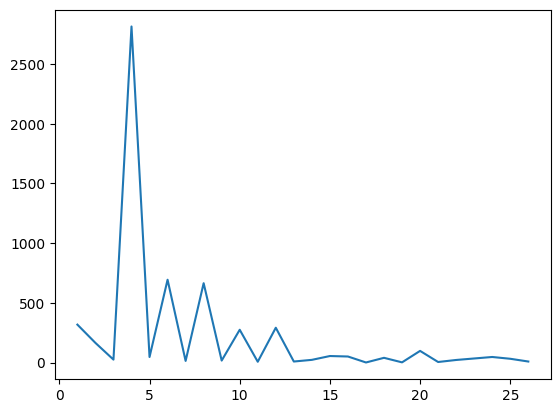

In [ ]:
def showPlotServings(df):
    servings = df['Persone/Pezzi'].to_list()
    val, counts = np.unique(servings, return_counts=True)
    plt.plot(val[:25],counts[:25])
showPlotServings(df)

### Portions allant jusqu'a 125...

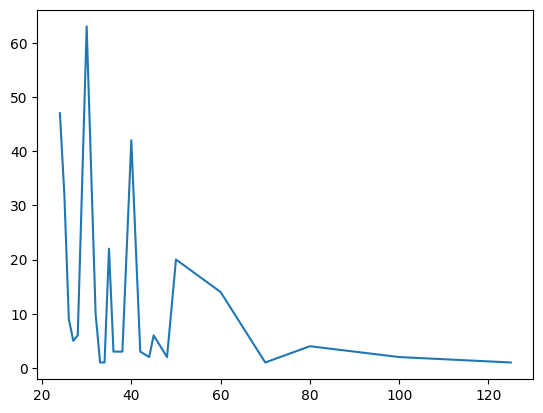

In [ ]:
def showPlotServingsWeird(df):
    servings = df['Persone/Pezzi'].to_list()
    val, counts = np.unique(servings, return_counts=True)
    plt.plot(val[22:],counts[22:])
showPlotServingsWeird(df)

## Statistics

In [ ]:
print("Nombre de recettes : ", len(df))
print("Nombre d'ingrédients uniques : ",len(un_ing))
print("Nombre d'ingrédients par recette en moyenne : ", nb_ing_moy)

Nombre de recettes :  5939
Nombre d'ingrédients uniques :  1642
Nombre d'ingrédients par recette en moyenne :  10.963630240781276


### Nombre d'ingredients par Categorie ?